## Working with GEMS-UMN EASE-DGGS in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/07_ease.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/07_ease.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/07_ease.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/07_ease.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2ease

In [1]:
from vgrid.conversion.latlon2dggs import latlon2ease

lat = 10.775276
lon = 106.706797
res = 4
ease_id = latlon2ease(lat, lon, res)
ease_id

'L4.165767.02.02.22.45'

### EASE to Polygon

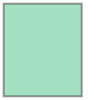

In [3]:
from vgrid.conversion.dggs2geo.ease2geo import ease2geo

ease_geo = ease2geo(ease_id)
ease_geo

### EASE to GeoJSON        

In [2]:
from vgrid.conversion.dggs2geo.ease2geo import ease2geojson

ease_geojson = ease2geojson(ease_id)
# ease_geojson

### Vector to EASE

Processing features: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


<Axes: >

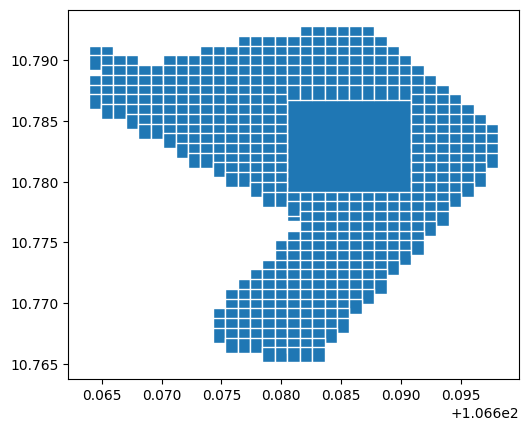

In [10]:
from vgrid.conversion.vector2dggs.vector2ease import vector2ease

file_path = "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon2.geojson"
vector_to_ease = vector2ease(
    file_path,
    resolution=4,
    compact=True,
    topology=False,
    predicate="intersects",
    output_format="gpd",
)
# Visualize the output
vector_to_ease.plot(edgecolor="white")

### EASE Compact

<Axes: >

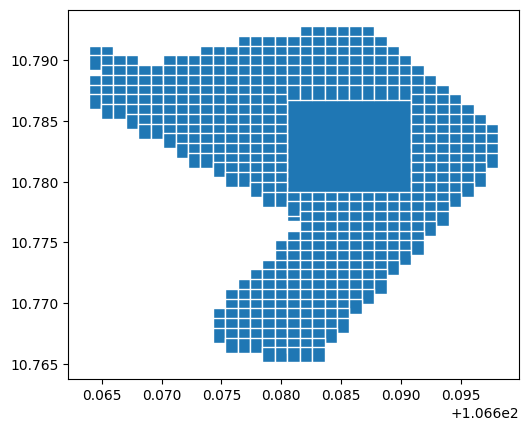

In [11]:
from vgrid.conversion.dggscompact.easecompact import easecompact

ease_compacted = easecompact(vector_to_ease, output_format="gpd")
ease_compacted.plot(edgecolor="white")

### EASE Expand

<Axes: >

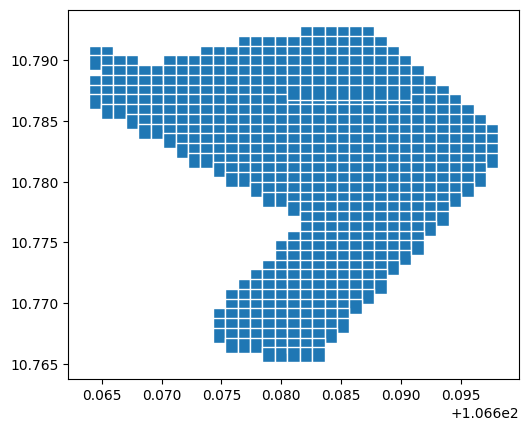

In [12]:
from vgrid.conversion.dggscompact import easeexpand

ease_expanded = easeexpand(vector_to_ease, resolution=4, output_format="gpd")
ease_expanded.plot(edgecolor="white")

### EASE Generator

Generating EASE DGGS: 100%|██████████| 4/4 [00:00<00:00, 335.58 cells/s]


<Axes: >

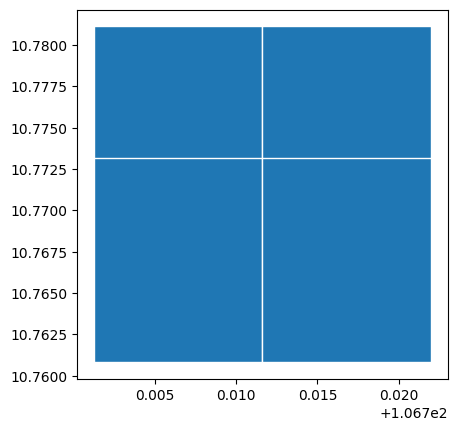

In [8]:
from vgrid.generator.easegrid import easegrid

ease_grid = easegrid(
    resolution=3,
    bbox=[106.699007, 10.762811, 106.717674, 10.778649],
    output_format="gpd",
)
ease_grid.plot(edgecolor="white")

### EASE Inspect

In [ ]:
from vgrid.stats.easestats import easeinspect

resolution = 0
ease_inspect = easeinspect(resolution)
ease_inspect.head()

### EASE Normalized Area Histogram

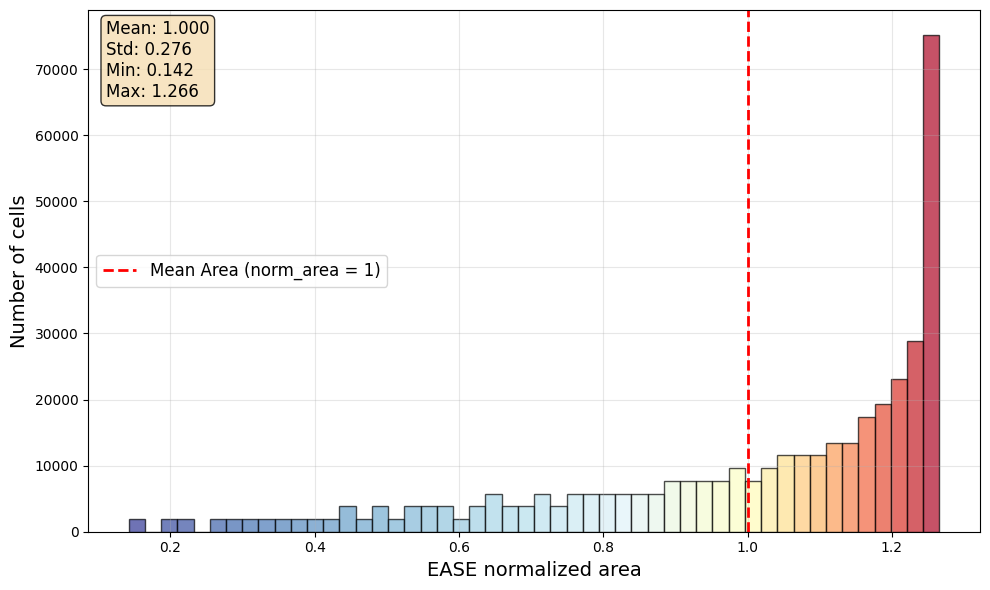

In [ ]:
from vgrid.stats.easestats import ease_norm_area_hist

ease_norm_area_hist(ease_inspect)

### Distribution of EASE Area Distortions

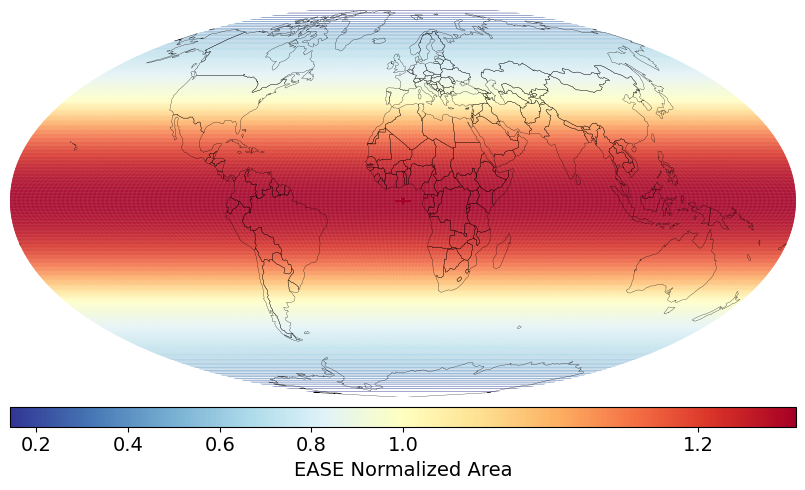

In [ ]:
from vgrid.stats.easestats import ease_norm_area

ease_norm_area(ease_inspect)

### EASE IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.


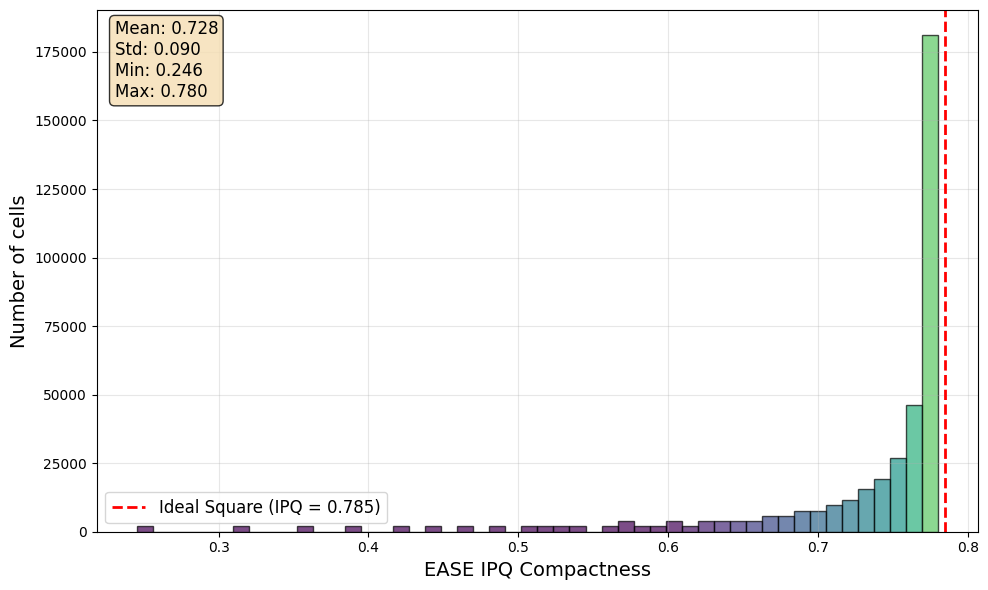

In [ ]:
from vgrid.stats.easestats import ease_compactness_ipq_hist

ease_compactness_ipq_hist(ease_inspect)

### Distribution of EASE IPQ Compactness

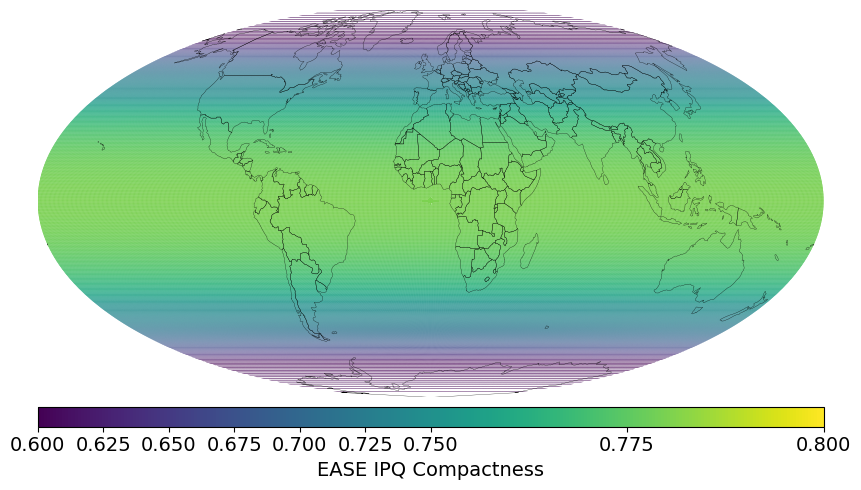

In [ ]:
from vgrid.stats.easestats import ease_compactness_ipq

ease_compactness_ipq(ease_inspect)

### EASE Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1]. 

As shapes become more concave, their convex hull compactness decreases toward 0.

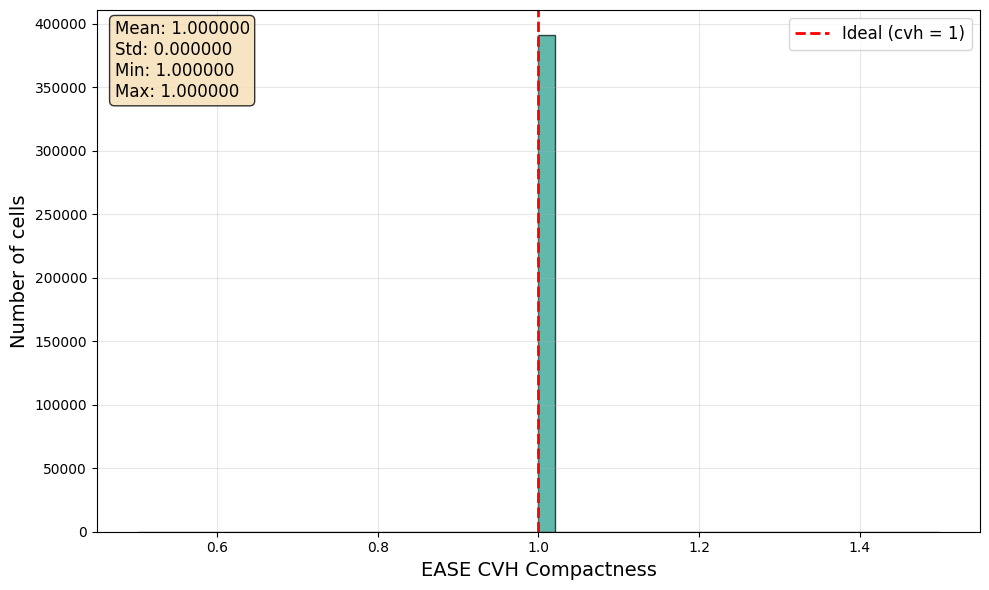

In [ ]:
from vgrid.stats.easestats import ease_compactness_cvh_hist

ease_compactness_cvh_hist(ease_inspect)

### Distribution of EASE Convex hull Compactness

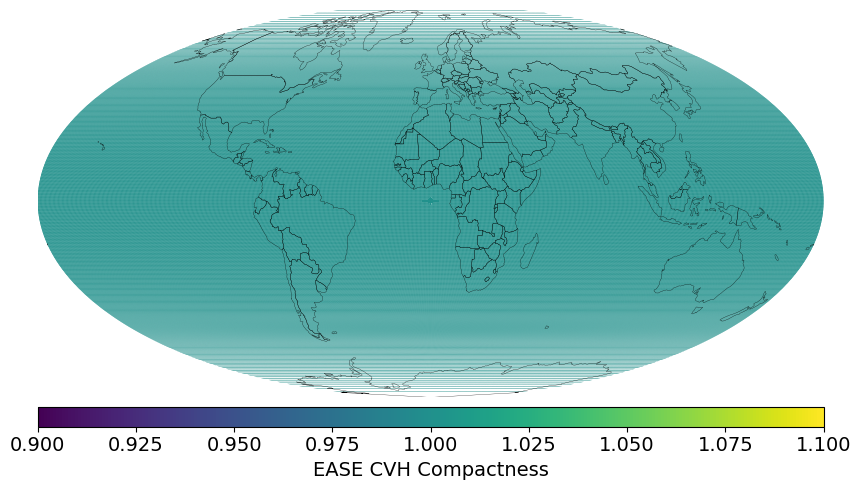

In [ ]:
from vgrid.stats.easestats import ease_compactness_cvh

ease_compactness_cvh(ease_inspect)

### EASE Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [ ]:
from vgrid.stats.easestats import easestats

easestats()

resolution  number_of_cells  avg_edge_len_m  avg_cell_area_m2         cls_m
0           0           391384    36032.220841      1.298321e+09  40658.024589
1           1          6262144     9008.055210      8.114506e+07  10164.502105
2           2         56359296     3002.685070      9.016118e+06   3388.167288
3           3        507233664     1000.895023      1.001791e+06   1129.389093
4           4      50723366400      100.089502      1.001791e+04    112.938909
5           5    5072336640000       10.008950      1.001791e+02     11.293891
6           6  507233664000000        1.000895      1.001791e+00      1.129389